# Data Manipulation with pandas
1. Transforming DataFrames
    - Sorting and subsetting
    - Creating new columns
2. Aggregating DataFrames
    - Summary statistics
    - Counting
    - Grouped summary statistics
3. Slicing and Indexing DataFrames
    - Subsetting using slicing
    - Indexes and subsetting using indexes
4. Creating and Visualizing DataFrames
   - Plotting
   - Handling missing data
   - Reading data into a DataFrame

In [2]:
#Run the code below to import the data used in this course.

# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the four datasets
avocados = pd.read_csv("datasets/avocado.csv")
homelessness = pd.read_csv("datasets/homelessness.csv")
temperatures = pd.read_csv("datasets/temperatures.csv")
sales = pd.read_csv("datasets/walmart.csv")    # for easeness, I am extracting this data as only sales

# 1. Transforming DataFrames

## Introduction to DataFrames 
- Pandas are built on NumPy and mathplotlib.
- df.head(): displays the first five rows
- df.info(): displays the names of columns, the data types they contain, and whether they have any missing values.
- df.shape: this attribute gives (#rows, #columns)
- df.describe(): computes some summary statistics (quick overview) for numerical columns, like mean and median. "count" is the number of non-missing values in each column. 
- df.values: returns values in 2D array.
- df.columns: returns columns labels
- df.index: returns row numbers or row names.

## Sorting and subsetting
Sorting:
- df.sort_values('column_name', ascending = False) : sorts the selected column, when ascending=False, sorts the other way around.
- df.sort_values('cname1', 'cname2', ascending = [True, False]): sorts according tothe column 'cname1' first.

Subsetting columns:
- df['cname']: subsets a single column
- df[['cname1', 'cname2']]: subsets two columns. The outer square brackets subsets the DataFrame, the inner square brackets are creating a list of column names to subset.

Subsetting rows:
- df[df['cname']<10] or df[df['cname']=='some_text'] : subsets depending on the logical condition.
- to subset based on multiple conditions: use logical operators, see below.
- df['cname'].isin(['value1', 'value2']): subsets filtering on multiple values of a categorical variable.

## New columns
- df['new_column_name'] = df['...']*/-  (some calculation)
- There was another way to ad.... chekc it !!!!

We have learnt: sorting rows, subsetting columns, subsetting rows, and adding new columns.

In [ ]:
### Introdcution to DataFrames ###

# homelessness is a DataFrame containing estimates of homelessness in each U.S. state in 2018. 
# individual: the number of homeless individuals not part of a family with children. 
# family_members: the number of homeless individuals part of a family with children.
# state_pop: the state's total population.

print(homelessness.head())
print(homelessness.info())
print(homelessness.shape)
print(homelessness.describe())
print(homelessness.values)
print(homelessness.columns)
print(homelessness.index)

In [ ]:
### Sorting and subsetting ###

#-----------------------------------------------
# Sorting

# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values("individuals")
#print(homelessness_ind.head())

# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members', ascending=False)
#print(homelessness_fam.head())

# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'], ascending=[True, False])
#print(homelessness_reg_fam.head())

#-------------------------------------------------
# Subsetting columns
# Select the individuals column
individuals = homelessness['individuals']
#print(individuals.head())

# Select the state and family_members columns
state_fam = homelessness[['state', 'family_members']]
#print(state_fam.head())

# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals','state']]
#print(ind_state.head())

#--------------------------------------------------
# Subsetting rows

# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals']>10000]
#print(ind_gt_10k)

# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region']=='Mountain']
#print(mountain_reg)

# Filter for rows where family_members is less than 1000 and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) & (homelessness['region']=='Pacific')]
#print(fam_lt_1k_pac)

#-------------------------------------------------
# Subsetting rows by categorical variables

# Filter homelessness for cases where the USA census state is in
# the list of Mojave states, canu, assigning to mojave_homelessness

# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]
# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]
#print(mojave_homelessness)


In [5]:
#--------------------------------------------------
### New columns ###

# Add total column as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_homeless column as proportion of total homeless population to the state population
homelessness['p_homeless'] = homelessness['total'] / homelessness['state_pop']

print(homelessness.head())

#----------------------------------------------------
# TASK: "Which state has the highest number of homeless individuals per 10,000 people in the state?" 

# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals'] / homelessness['state_pop'] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k']> 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state', 'indiv_per_10k']]
print(result)

# COMMENTS: The number of homeless people for per 10K people is the highest in
# District of Columbia, that is 54 homeless people for per 10K people. 
# This rate is almost double of the homeless individuals in Hawaii. 
# As a big metropolitan city, New York has the lowest ratio of homeless people.


               region       state  ...  p_homeless  indiv_per_10k
0  East South Central     Alabama  ...    0.000703       5.258117
1             Pacific      Alaska  ...    0.002742      19.506515
2            Mountain     Arizona  ...    0.001378      10.141067
3  West South Central    Arkansas  ...    0.000901       7.575423
4             Pacific  California  ...    0.003294      27.623825

[5 rows x 8 columns]
                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363
<bound method NDFrame.describe of                    state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada    

# 2. Aggregating DataFrames

## Summary Statistics
- df['column_name'].mean(),.median(),.mode(),.mind(),.max(),.var(),.std(),.sum(),.quantile()
- min and max methods works for dates too.
- the .agg() method: The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient.
   df['column'].agg(function)
- .cumsum(), .cummax(), .cummin(), .cumprod(): all those returns a whole column instead of a single number

## Counting
- Summarizing categorical data using counting. Removing duplicates is an essential skill to get accurate counts.
- dropping duplicate names: df.drop_duplicates(subset='column_name')
- dropping duplicate pairs: df.drop_duplicates(subset=['cname1', 'cname2'] )
- count numbers of the required argument: df['cname'].value_counts(), df['cname'].value_counts(sort=True)
- count and normalize the argument: df['cname'].value_counts(normalize=True)

## Grouped summary statistics
- The .groupby() method  is used for grouped summary statistics.
- df.groupby('cname_to_categorize')['cname_to summarize'].mean()
- df.groupby('cname_to_categorize')['cname_to_summarize'].agg([min, max, sum])
- df.groupby(['cname1', 'cname2'])['cname_to_summarize'].mean()
- combination also works: many groups, many summaries

## Pivot tables
- Another way of calculating grouped summary statistics, that is, the .pivot_table() method is an alternative to .groupby().
- Pivot tables are the standard way of aggregating data in spreadsheets.
-  df.groupby('cname_to_categorize')['cname_tobe_summarized'].mean() 
    = df.pivot_table(values='cname_to_summarize, index='cname_to_categorize')
- For different statisctics: use aggfunc argument: 
    df.pivot_table(values='cname_to_summarize', index='cname_to_categorize', aggfunc=np.median)
- Multiple statistics:
    df.pivot_table(values='cname_to_sum', index='cname_to_cat', aggfunc=[np.mean, np.median])
- Pivot on two variables:
    df.groupby(['cname1', 'cname2'])['cname_to_sum'].mean() 
    = df.pivot_table(values='cname_to_sum', index='cname1', columns='cname2')
- To fill the missing values: 
    Pivot table on two variables looks different, there are NaNs for missing values. 
    fill_value replaces missing values with a real value (known as imputation). 
    df.pivot_table(values='cname_to_sum', index='cname1', columns='cname2', fill_value=0)
- Summing with pivot tables:
    Margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by
    each of those variables separately: it gives the row and column totals of the pivot table contents.
    The last row and last column of the pivot table contain the mean of all the values in the column or row 
    (not including the missing filled in with 0s):
    df.pivot_table(values='cname_to_sum', index='cname1', columns='cname2', fill_value=0, margins=True)

In [4]:
###  Summary Statistics  ###

# Walmart (the 'sales' DataFrame) distinguishes three types of stores: "supercenters," "discount stores," 
# and "neighborhood markets," encoded in this dataset as type "A," "B," and "C." 

#--------------------------------------------
# Mean and median

# Print the head and info of the sales DataFrame
print(sales.head())
print(sales.info())

# Print the mean and median of weekly_sales
print(sales['weekly_sales'].mean())
print(sales['weekly_sales'].median())

#--------------------------------------------
# Summarizing dates

# Print the maximum and minimum of the date column
print(sales['date'].max())
print(sales['date'].min())

#--------------------------------------------
# Efficient summaries

# A custom IQR: inter-quartile range function
# IQR: the 75th percentile minus the 25th percentile
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# IQR of the temperature_c column
sales_t_iqr = sales['temperature_c'].agg(iqr)

# IQR of temperature_c, fuel_price_usd_per_l, & unemployment
sales_2c_iqr = sales[["temperature_c", 'fuel_price_usd_per_l', 'unemployment']].agg(iqr)

# IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
sales_3c_2agg = sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median])

#print(sales_t_iqr)
#print(sales_2c_iqr)
#print(sales_3c_2agg)

#--------------------------------------------
# Cumulative statistics

# A DataFrame sales_1_1 contains the sales data for department 1 of store 1.
sales_1_1 = sales[(sales['store'] == 1) & (sales['department'] == 1)]

# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date', ascending=True)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

   store type  department  ... temperature_c  fuel_price_usd_per_l  unemployment
0      1    A           1  ...      5.727778              0.679451         8.106
1      1    A           1  ...      8.055556              0.693452         8.106
2      1    A           1  ...     16.816667              0.718284         7.808
3      1    A           1  ...     22.527778              0.748928         7.808
4      1    A           1  ...     27.050000              0.714586         7.808

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10774 non-null  float64
 5   is_holiday            

In [20]:
###  Counting ###

#--------------------------------------------
# Dropping duplicate

# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store', 'type'])
#print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store', 'department'])
#print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']==True].drop_duplicates(subset='date')
#print(holiday_dates['date'])

#--------------------------------------------
# Counting categorical variables

# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
#print(store_counts)

# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
#print(store_props)

# Count the number of stores for each department in store_depts and sort in descending order.
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
#print(dept_counts_sorted)

# Get the proportion of stores in each department store_depts and sort in descending order.
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
#print(dept_props_sorted)


In [11]:
###  Summaty statistics  ###

#--------------------------------------------
# TASK: 'What percent of sales occurred at each store type?'
# In this exercise, you'll calculate the total sales made at each store type, without using .groupby(). 

# 1. Calculate the total weekly_sales over the whole dataset.
sales_all = sales["weekly_sales"].sum()

# 2. Subset for type "A", "B" and "C" stores, and calculate their total weekly sales.
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# 3. Combine the A/B/C results into a list, and divide by sales_all to get the proportion of each type.
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
#print(sales_propn_by_type)
#print(sales_A, sales_B, sales_C)

#--------------------------------------------
# Calculations with .groupby()

# 1 and 2. Group sales by "type", take the sum of "weekly_sales", and store as sales_by_type.
# 'type': column name to be categorized
# 'weekly_sales': column name to be summarized
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
#print( sales.groupby("type").head())
#print(sales_by_type)

# 3. Calculate the proportion of sales at each store type.
sales_propn_by_type = sales_by_type / sum(sales_by_type)
#print(sales_propn_by_type)

# Group sales by "type" and "is_holiday", take the sum of weekly_sales, and store as sales_by_type_is_holiday.
sales_by_type_is_holiday = sales.groupby(['type', 'is_holiday'])['weekly_sales'].sum()
#print(sales_by_type_is_holiday)

#--------------------------------------------
# Multiple grouped summaries

# 1. For each store type, aggregate weekly_sales: get numpy min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.mean, np.median])
#print(sales_stats)

# 2. For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment', 'fuel_price_usd_per_l']].agg([np.min, np.max, np.mean, np.median])
#print(unemp_fuel_stats)


In [3]:
###  Pivot tables  ###

#--------------------------------------------
# Pivoting on one variable

# 1. Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values='weekly_sales', index='type')
print(sales.head())
print(mean_sales_by_type)

# 2. Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values='weekly_sales', index='type', aggfunc=[np.mean, np.median])
#print(mean_med_sales_by_type)

# 3. Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values='weekly_sales', index='type', columns='is_holiday')
print(mean_sales_by_type_holiday)

#--------------------------------------------
# Fill in missing values and sum values with pivot tables

# 1. Print mean weekly_sales by department and type; fill missing values with 0
sales_dept_type = sales.pivot_table(values='weekly_sales', index='department', columns='type', fill_value=0)
print(sales_dept_type)

# 2. Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and columns
sales_dept_type_margin = sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True)
#print(sales_dept_type_margin)

# IMPORTANT: Note the subtlety(incelik, kurnazlik) in the value of margins here. 
# The column 'All' returns an overall mean for each department, not (A+B)/2. 
# (A+B)/2 would be a mean of means, rather than an overall mean per department!

   store type  department  ... temperature_c  fuel_price_usd_per_l  unemployment
0      1    A           1  ...      5.727778              0.679451         8.106
1      1    A           1  ...      8.055556              0.693452         8.106
2      1    A           1  ...     16.816667              0.718284         7.808
3      1    A           1  ...     22.527778              0.748928         7.808
4      1    A           1  ...     27.050000              0.714586         7.808

[5 rows x 9 columns]
      weekly_sales
type              
A     23674.667242
B     25696.678370
is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500
type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364 

# 3. Slicing and Indexing DataFrames

## Explicit indexes
-  DataFrames are composed of three parts: a NumPy array for the data, and two indexes to store the row and column details.
-  df.columns contains an Index object of column names, and df.index contains an Index object of row numbers.
-  df_ind = df.set_index('cname'): 'cname' is now set as index of df.
-  To undo: df_ind.reset_index(). 
-  df_ind.reset_index(drop=True): discard an index, entirely removes the names.
-  Indexing makes subsetting code cleaner and simpler:
    df[df['cname'].isin[['rname1', 'rname2']]] = df_ind.loc[['rname1', 'rname2']]
-  Index values do not need to be unqie. While subsetting on duplicated index values, all values are returned.
-  Multicolumn indexes: df.set_index(['cname1', 'cname2'])
-  df_ind1 = df.set_index(['cname1', 'cname2'])
   Subset the outer level with a list: df_ind1.loc[['rname1', 'rname2']]
   Subset inner levels with a list tuples: df_ind1.loc[('rname1','anotherrowname1'),('rname2','anotherrowname2')]
-  Sorting wtr index.: df_ind.sort_index(), df_ind.sort_index(level=['cname1', 'cname2'], ascending=[True,False])
-  Downsides of indexes: 
    - Index values are just data. 
    - Indexes violate 'tidy data' principles.
    - Two syntaxes must be learnt. In pandas, the syntax for working with indexes is different from the syntax for working with columns. 
-  Syntax refers to the way you specify rows and columns when indexing or selecting data from a DataFrame.

## Slicing and subsetting with .loc and .iloc
- Sort the index (multicolumn indexes here) before slicing it: 
  df_srt = df.set_index([cname1, cname2]).sort_index()
- Slicing the outer index level:
  df_srt.loc[outind1: outind5]
- Differences of DataFrame slicing in comparison to list slicing:
  - Index values are specified rather than row numbers
  - The final value 'label5' is included in the sliced DataFrame.
- Slicing the inner index level badly: the same technique does not work and pandas does not give an error here!!!
- Slicing the inner index level correctly: inlcude the both level index inside tuples. 
  df_ind1.loc[(outind1,inind1):(outind5,inind5)]
- Slicing columns: df_srt.loc[labelnames, columnnames] = df_srt.loc[:,cname1:cname4]
- Slicing rows and columns at the same time: 
  df_ind1.loc[(outind1,inind1):(outind5,inind5), cname1:cname4 ]
- Slicing by row and column number: use 'iloc' method with index numbers
  - It is like list slicing but unlike loc lethod
  - The last values are not included inside sliced data.

## Working with pivot tables
-  Perform subsetting and calculations on pivot tables.
- df_pivot = df.pivot_table(values='cname_to_summarize, index='cname1_to_categorize', column='cname2_to_categorize')
  - = df.groupby(['cname1', 'cname2'])['cname_to_sum'].mean() 
  - The first argument is the column name containing values to aggregate.
  - The index argument lists the columns to group by and display in rows.
  - The columns argument lists the columns to group by and display in columns. 
-  Pivot tables are just DataFrames with sorted indexes, then:
  - all slicing and subsetting in this section can be used on them.
  - the loc and slicing combination is ideal for subsetting pivot tables
- The axis arguments: Calculating summary statistics in DataFrames have axis argument.
  - The mean() function only accepts axis=0 for rows or axis=1 for columns.
  - Summary stats across (boyunca) rows:
    - df_pivot.mean(axis=0)
    - The default "index" means "calculate the statistic across (boyunca) rows".
    - The mean is calculated for each 'cname2'.
  - Summary stats across columns:
    - df_pivot.mean(axis=1)
    - The mean is calculated for each 'cname1.
- For most DataFrames, setting the axis argument doesn't make any sense because of different data types in each column. Pivot tables are a special case since every column contains the same data type.
- To remember: df.pivot_table(values='cname_to_summarize', index='cname_to_categorize', aggfunc=np.median)


In [3]:
###  Explicit indexes  ###

# Here, we are working with the 'temperatures' data, 
# a DataFrame of average temperatures in cities around the world. 

#--------------------------------------------
# Setting and removing indexes

# Look at temperatures
print(temperatures.head())

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind.head())

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

#--------------------------------------------
# Subsetting with .loc[]
# The killer feature for indexes is .loc[]: a subsetting method that accepts index values.
# The code for subsetting using .loc[] can be easier to read than standard [] subsetting.

# Make a list of cities that contains "Moscow" and "Saint Petersburg".
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets wrt cities in the cities list.
print(temperatures[temperatures['city'].isin(cities)])

# Subset temperatures_ind using .loc[] for cities in the cities list.
print(temperatures_ind.loc[cities])

#--------------------------------------------
# Setting multi-level indexes

# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country', 'city'])
#print(temperatures_ind.head())

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('Brazil', 'Rio De Janeiro'), ('Pakistan', 'Lahore')]

# Subset or rows_to_keep using .loc[].
print(temperatures_ind.loc[rows_to_keep])

#--------------------------------------------
# Sorting by index values

# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level='city'))

# Sort temperatures_ind by ascending country then descending city
print(temperatures_ind.sort_index(level=['country','city'], ascending=[True,False]))


         date     city        country  avg_temp_c
0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000-05-01  Côte D'Ivoire      27.547
          city        date        country  avg_temp_c
0      Abidjan  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan  2000-03-01  Côte D'Ivoire      29.061
3      Abidjan  2000-04-01  Côte D'Ivoire      28.162
4      Abidjan  2000-05-01  Côte D'Ivoire      27.547
...        ...         ...            ...      

In [ ]:
### Slicing and subsetting with .loc and .iloc  ###

#--------------------------------------------
# Slicing index values

# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

# Try to subset rows from Lahore to Moscow (This will return nonsense.)
print(temperatures_srt.loc['Lahore':'Moscow'])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[('Pakistan', 'Lahore'):('Russia','Moscow')])

#--------------------------------------------
# Slicing in both directions

# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,'date':'avg_temp_c'])

# Subset in both directions at once
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad'), 'date':'avg_temp_c'])

#--------------------------------------------
# Slicing time series

# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date'] >= "2010-01-01") & (temperatures['date'] <= "2011-12-31")]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08-01':'2011-02-01'])

#--------------------------------------------
# Subsetting by row/column number

# The most common ways to subset rows are the ways we've previously discussed: 
# using a Boolean condition or by index labels. 
# However, it is also occasionally useful to pass row numbers in iloc method.

# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[:5,2:4])


In [ ]:
### Working with pivot tables ###

#--------------------------------------------
# Pivot temperature by city and year

# You can access the components of a date (year, month and day) 
# using code of the form dataframe["column"].dt.component. For example, 
# the month component is dataframe["column"].dt.month, 
# and the year component is dataframe["column"].dt.year.

# Add a year column to temperatures, from the year component of the date column.
temperatures['year'] = temperatures['date'].dt.year
print(temperatures.head())

# Make a pivot table of the avg_temp_c column, with country and city as rows, and year as columns.
temp_by_country_city_vs_year = temperatures.pivot_table(values='avg_temp_c', index=['country','city'], columns='year')

# See the result
print(temp_by_country_city_vs_year)

#--------------------------------------------
# Subsetting pivot tables

# Subset for Egypt to India
print(temp_by_country_city_vs_year.loc['Egypt':'India'])

# Subset for Egypt, Cairo to India, Delhi
print(temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi')])

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
print(temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'),'2005':'2010'])

#--------------------------------------------
# Calculating on a pivot table

# The mean() function only accepts axis=0 for rows or axis=1 for columns

#  NOTE: Discrepancy between the video and the use of mean().!!!!

# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis=0)
print(temp_by_country_city_vs_year.head())
print(mean_temp_by_year.head())

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis=1)
print(mean_temp_by_city.head())

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

# 4. Creating and Visualizing DataFrames

## Visualizing your data
- Use a histogram to visualiye the distribution of a numeric variable.
- df[cname].hist(bins=10)
- Remember the .groupby() method for grouped summary statistics:
  - df_group = df.groupby('cname_to_categorize')['cname_to summarize'].mean()
  - df.groupby('cname_to_categorize')['cname_to_summarize'].agg([min, max, sum])
  - df_group.plot(kind='bar', title='...') to visualise in a bar plot.
- df.plot(x='...', y='...', kind='...', rot=45)
  - kind is the kind of plot
  - rot is the rotation degrees of xlabels.
  - kind='scatter': to visiualise relationships between two numeric variables
- Layering plots: 
  - before plt.show(), print more plotting commands
  - add plt.legend([...,...]) to distinguish them
  - for example, in histogram figure use .hist(alpha=0.5) for opacity to see both figures. 0: completely transparent, 1: completely opaque.

## Missing values
- Missing values are indicated as NaN (not a number) in DataFrames.
- Detecting missing values: df.isna(), getting a Boolean for every single values.
- Detecting any missing values: df.isna().any() returns only one Boolean for the whole column.
- Counting missing values: df.isna().sum(), df.isna().sum().plot(kind='bar')
- Removing missing values: 
  - remove rows including missing values: df.dropna(), not recommended as possible to loose many observations.
  - replacing mmissing values: df.fillna(0) replaces missing values with 0.
  - There are better methods to fill missing values, that we will learn in the course called 'Missing data'.

## Creating DataFrames
- From a list of dictionaries:
  - construcred row by row
  - list_of_dicts = [{dict0}, {dict1},....]
  - df = pd.DataFrame(list_of_dicts)
- From a dictionary of list
  - constructed column by column
  - dict_of_lists = {key0 =[k0_val0, k0_val1], key1=[k1_val0, k1_val1],...}
  - df = pd.DataFrame(dict_of_lists)
  - key becomes column name, value becomes list of column values.

## Reading and writing CSVs
- CSV: comma seperated values
- df = pd.read_csv('file_path_to_csv')
- after some update in a DataFrame df, df.to_csv('df_updated.csv')
- the updated data takes place in df_updated.csv file.

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56
size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64


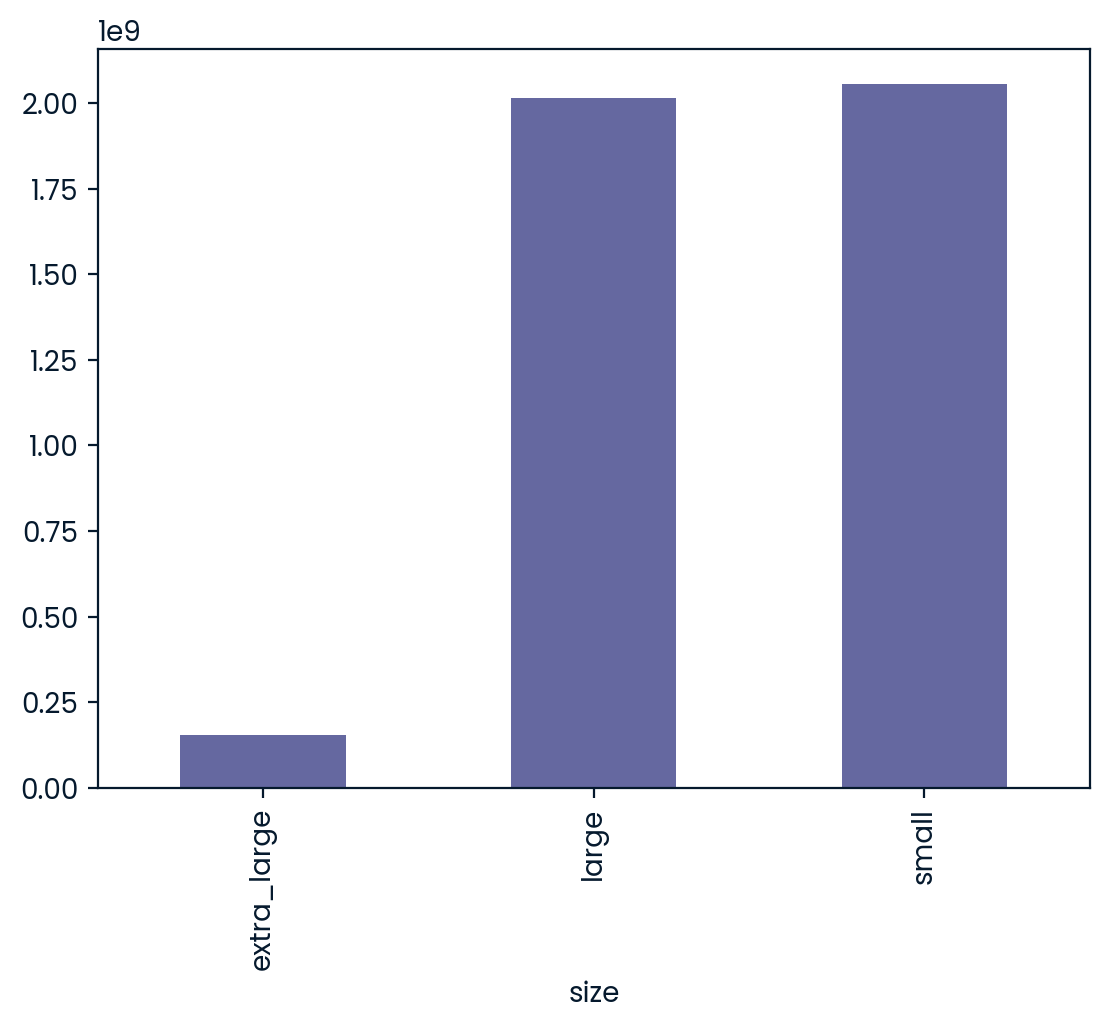

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64


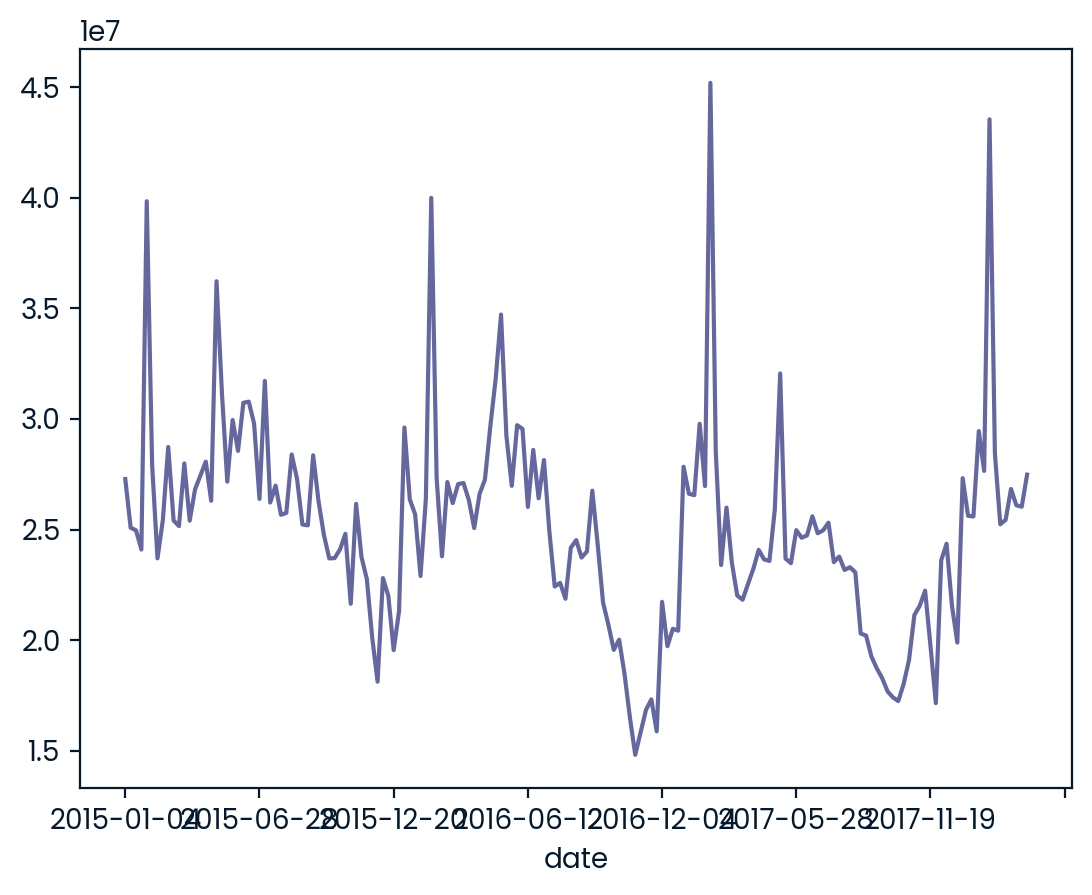

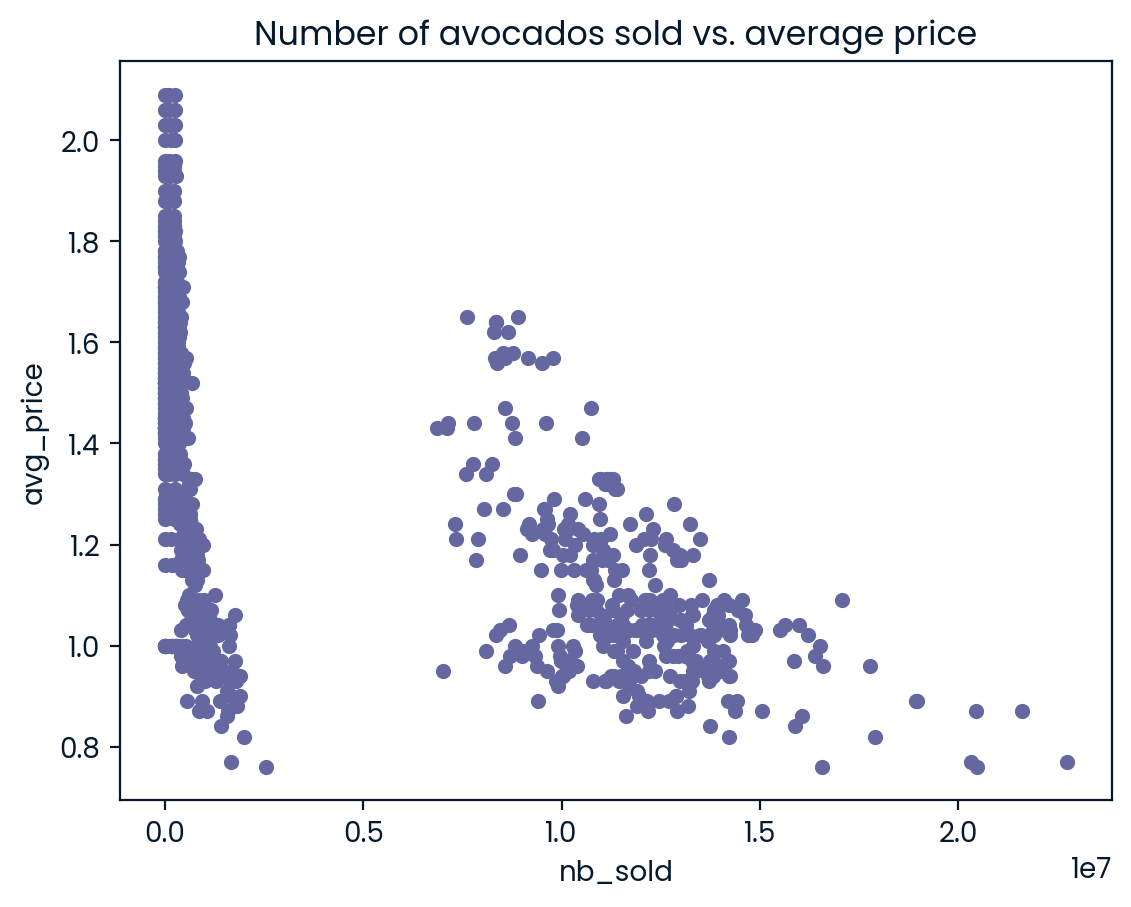

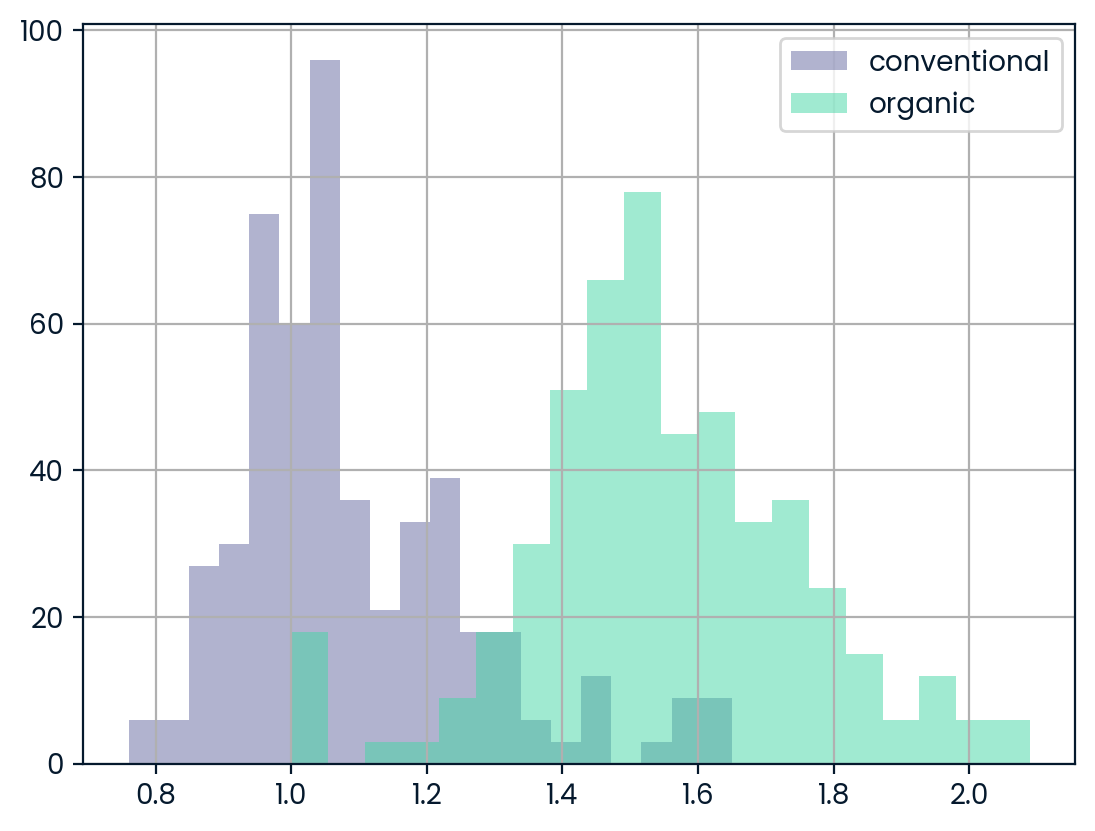

In [10]:
### Visualizing your data ###

# The Hass Avocado Board keeps track of avocado supply and 
# demand across the USA, including the sales of three different sizes of avocado. 
# Here, we will work on this avocado data.

#--------------------------------------------
# Which avocado size is most popular?

# Bar plots are great for revealing relationships between categorical and numeric variables
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
print(nb_sold_by_size.head())

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')
plt.show()

#--------------------------------------------
# Changes in sales over time

# Line plots are designed to visualize the relationship between two numeric variables, 
# where each data values is connected to the next one. They are especially useful for 
# visualizing the change in a number over time since each time point is naturally 
# connected to the next time point. 

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()
print(nb_sold_by_date)

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')
plt.show()

#--------------------------------------------
# Avocado supply and demand

# Scatter plots are ideal for visualizing relationships between numerical variables.

# Compare the number of avocados sold to average price and see if they're at all related.
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')
plt.show()

# COMMENT: More avocados are sold, lower prices they have. 
# However, this is not true the other way around: fewer sales causes higher prices.
# They are only correlated with each other.

#--------------------------------------------
# Price of conventional vs. organic avocados

# Histogram of conventional avg_price 
avocados[avocados['type']=='conventional']['avg_price'].hist(bins=20, alpha=0.5)

# Histogram of organic avg_price
avocados[avocados['type']=='organic']['avg_price'].hist(bins=20, alpha=0.5)

plt.legend(['conventional','organic'])
plt.show()


In [ ]:
### Missing values ###

#--------------------------------------------
# Finding missing values

#plt.clf()

# TODO: avocados_2016 data is a different data and I do not have it!!!!......
# avocados_2016: a subset of avocados that contains only sales from 2016.
#avocados_2016 = avocados[avocados['year'] == 2016]
#print(avocados_2016)

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
print(avocados_2016.isna().sum())
print(avocados.head())

avocados_2016.isna().sum().plot(kind='bar')
plt.show()

#--------------------------------------------
# Removing missing values

# Removing observations with missing values is a quick and dirty way 
# to deal with missing data, but this can introduce bias to your data 
# if the values are not missing at random.

# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

#--------------------------------------------
# Replacing missing values

# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()
plt.show()

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)
# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()
plt.show()

# Comment: Notice the change in the shape of the distribution after replacement.

In [ ]:
### Creating DataFrames ###

#--------------------------------------------
# List of dictionaries
# Create a list of dictionaries with new data
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348}]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)
print(avocados_2019)

#--------------------------------------------
# Dictionary of lists

# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)
print(avocados_2019)


In [ ]:
### Reading and writing CSVs ###

# Making competitive analysis on how often passengers flying on 
# other airlines are involuntarily bumped from their flights. 
# The file 'airline_bumping.csv' contains data on passengers 
# that were involuntarily denied boarding in 2016 and 2017,
# but it doesn't have the exact numbers you want.

#--------------------------------------------
# CSV to DataFrame

# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv('airline_bumping.csv')
print(airline_bumping.head())

# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby('airline')[['nb_bumped','total_passengers']].sum()
print(airline_totals.head())

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals['nb_bumped']/airline_totals['total_passengers'] * 10000
print(airline_totals)

#--------------------------------------------
# DataFrame to CSV

# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k', ascending=False)
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv('airline_totals_sorted.csv')
